In [6]:
import os
import matplotlib.pyplot as plt
import pims
import sys
import numpy as np
sys.path.insert(0,'/home/jmamede/scripts')
# from support_pla import othercolor, cell_mask, multiply, rebin
from support_pla import cellpose_mask,cellpose_model
import pandas as pd
from nd2reader import ND2Reader
import glob
import csv
plot = True
import napari
from napari.qt import thread_worker
from cellpose.utils import masks_to_outlines
from napari.qt import thread_worker
import sys, contextlib, io
import cellpose
sys.path.insert(0,'/home/jmamede/scripts')
from support_pla import cellpose_mask,cellpose_model
from cellpose import io as iocp
from cellpose import plot,utils
import matplotlib.pyplot as plt
import pims
import time
import numpy as np
from nd2reader import ND2Reader

In [7]:
# ficheiro = "/run/media/jmamede/Joao/96wells/20201119_143803_601/WellA01_ChannelGFP,DAPI_Seq0000.nd2"
# dirname = '/home/jmamede/Data/stephanieHCA/*.nd2'
dirname = "/run/media/jmamede/Joao/till/fixed40x/prj/*PRJ.ome.tiff"
filelist = glob.glob(dirname)
filelist.sort()


# reader = ND2Reader(ficheiro)
# print(reader.sizes)

# metadata = reader.metadata
# reader.bundle_axes = 'cyx'
# reader.iter_axes = 'z'
# #there is a bug, it reads each visit point as a Z.
# reader.default_coords['v'] = 0
# #reader.sizes['z']

# def plots(reader,cells_masks,nuclei_masks,base,series):
#     %matplotlib inline
#     from cellpose.utils import masks_to_outlines
#     f, axarr = plt.subplots(3)
#     print(axarr.shape)
#     axarr[0].imshow(reader[series][1],vmin=np.min(reader[5][1]),vmax=np.max(reader[5][1])/2
# #         ,cmap="gray"
#                      )
#     axarr[0].imshow(masks_to_outlines(cells_masks),alpha=0.6,cmap='gray'
#         )
# #     axarr[0,2].imshow(reader[i][0],vmin=100,vmax=np.max(reader[5][0])/3
# #         )
#     axarr[2].imshow(reader[series][1],vmin=np.min(reader[5][1]),vmax=np.max(reader[5][1])/2
# #         ,cmap="gray"
#                      )
#     axarr[2].imshow(cells_masks,alpha=0.4,cmap='jet')
    
#     axarr[1].imshow(reader[series][0],vmin=np.min(reader[5][0]),vmax=np.max(reader[5][0])/2
# #                       ,cmap="gray"
#         )
#     axarr[1].imshow(masks_to_outlines(nuclei_masks),alpha=0.4,cmap='gray')
        
        
# #     axarr[1,2].imshow(reader[i][1],vmin=100,vmax=np.max(reader[5][0])/3
# #         )
# #     axarr[1,2].imshow(nuclei_masks
# # #                 ,alpha=0.6
# #         )
#     plt.savefig(base+'v'+str(series),dpi=600)
#     return f,axarr



model = cellpose_model(GPU=True)
model_nuc = cellpose_model(GPU=True,model_type='nuclei')


** CUDA version installed and working. **
>>>> using GPU
cellpose_residual_on_style_on_concatenation_off
** CUDA version installed and working. **
>>>> using GPU
cellpose_residual_on_style_on_concatenation_off


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


Frame([[1436, 1461, 1506, ...,  996, 1087, 1183],
       [1701, 1733, 1788, ..., 1079, 1178, 1280],
       [1973, 1966, 1946, ..., 1142, 1236, 1318],
       ...,
       [  46,   45,   44, ...,  257,  256,  263],
       [  50,   50,   49, ...,  250,  255,  255],
       [  57,   58,   58, ...,  253,  255,  257]], dtype=uint16)
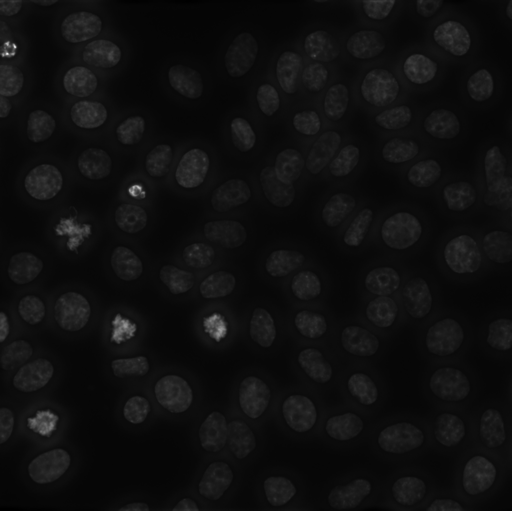

In [8]:
filelist
reader = pims.bioformats.BioformatsReader(filelist[0])
#     metadata = reader.metadata
reader.bundle_axes = 'yx'
reader.iter_axes = 'c'
#there is a bug, it reads each visit point as a Z.
#         reader.default_coords['v'] = 0
ncells = 0
nnuclei = 0
reader[3
      ]

In [9]:
sys.path.insert(0,'/home/jmamede/scripts')
# from support_pla import othercolor, cell_mask, multiply, rebin
from support_pla import cellpose_mask,cellpose_model

%gui qt

In [10]:
v = napari.Viewer(show=False)
v.show()
#     layer = viewer.add_image(np.random.random((512, 512)))
def updating(result):
#         v.layers.remove('image')
    from cellpose.utils import masks_to_outlines
    import time
    [v.layers.pop(0) for la in range(len(v.layers))]    

    v.add_image(
        result[1],
        blending='additive',
        contrast_limits=[np.min(result[1]),np.max(result[1])],
#         ndisplay=2,
        colormap='blue',
        name='nuclei'
    )   

    v.add_image(
        result[0],
        blending='additive',
        colormap='green',
        name='cells')

    v.add_labels(
    result[2],
    opacity=0.4,
    blending='additive',
#             contrast_limits=[np.min(result[2]),np.max(result[2])],
    name='Cells'
    ) 

    v.add_labels(
    masks_to_outlines(result[3]),
#     utils.outlines_list(result[0]),
    opacity=0.4,
    blending='additive',
#         contrast_limits=[np.min(result[1]),np.max(result[1])],
    name='Nuclei'
    )

@thread_worker(connect={'yielded': updating})
def poseri(filelist,chan_cells,chan_nuclei,model,model_nuc):
    f = open("/run/media/jmamede/Joao/till/fixed40x/prj/counts.txt", 'wt')
    output = csv.writer(f
    #                     , delimiter=',',
    #                             quotechar='"', quoting=csv.QUOTE_MINIMAL
                       )
    output.writerow(["Well","num_cells","infected_cells",
                     #"percentage"
                    ])

    for ficheiro in filelist:
        print(ficheiro)


       
        
#         reader = ND2Reader(ficheiro)
        reader = pims.bioformats.BioformatsReader(ficheiro)
    #     metadata = reader.metadata
        reader.bundle_axes = 'yx'
        reader.iter_axes = 'c'
        #there is a bug, it reads each visit point as a Z.
#         reader.default_coords['v'] = 0
        ncells = 0
        nnuclei = 0
        reader[0]
#         for i in range(reader.sizes['z']):
#             output2 = csv.writer(f2
#             #                     , delimiter=',',
#             #                             quotechar='"', quoting=csv.QUOTE_MINIMAL
#                                )
#             output2.writerow(["Well","VisitPoint","num_cells","infected_cells","percentage"])
#         for i in [0]:
        #shut cellpose messages up.
#             with contextlib.redirect_stdout(io.StringIO()):

        cells_masks = cellpose_mask(reader[chan_cells],model
        #                             ,size=2500
                                    ,flow_threshold=0.6,size=0,diam=50,cell_prob=0
                                   )
        nuclei_masks = cellpose_mask(reader[chan_nuclei],model_nuc
        #                             ,size=2500
                                    ,flow_threshold=1.2,size=0,diam=25,cell_prob=0
                                   )
#             ncells += cells_masks.max()
#             nnuclei += nuclei_masks.max()
        base = os.path.splitext(ficheiro)[0]
        outlines = utils.outlines_list(cells_masks)
        cell_outlines = utils.masks_to_outlines(cells_masks)
        iocp.outlines_to_text(base, outlines)

#             f,axarr =  plots(reader,cells_masks,nuclei_masks,base,i)

        text = "Image#: {0} Number of Nuclei: {1} Number of positive cells: {2} Percentage: {3}".format(ficheiro,nuclei_masks.max(),cells_masks.max(),cells_masks.max()/nuclei_masks.max())
        print(ficheiro,text)
#             output2.writerow([ficheiro,'NA',nnuclei,ncells,np.float64(cells_masks.max())/nuclei_masks.max()*100])
        output.writerow([ficheiro,nuclei_masks.max(),cells_masks.max(),
                         #np.float64(cells_masks.max())/nuclei_masks.max()*100
                        ])

        yield [reader[chan_cells],reader[chan_nuclei],cells_masks,nuclei_masks,
               #np.float64(cells_masks.max())/nuclei_masks.max()*100
              ]

        
#     from cellpose import io as iocp
#     from cellpose import plot,utils



model = cellpose_model(GPU=True)
model_nuc = cellpose_model(GPU=True,model_type='nuclei')

#     for ficheiro in filelist:
poseri(filelist,0,3,model,model_nuc)

#         average_large_image()
#         result.returned.connect(v.add_image)
#         result.start()


#         worker.start

#     layers[0].data = []
#     layers[1].data = []
#     layers[0] = []
#     layers[0] = []

** CUDA version installed and working. **
>>>> using GPU
cellpose_residual_on_style_on_concatenation_off
** CUDA version installed and working. **
>>>> using GPU
cellpose_residual_on_style_on_concatenation_off


/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v10_PRJ.ome.tiff


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.27s; flow+mask computation 0.65
estimated masks for 1 image(s) in 2.94 sec
>>>> TOTAL TIME 2.94 sec
processing 1 image(s)
time spent: running network 2.31s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.67 sec
>>>> TOTAL TIME 2.67 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v10_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v10_PRJ.ome.tiff Number of Nuclei: 100 Number of positive cells: 93 Percentage: 0.93
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v1_PRJ.ome.tiff


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 4.03s; flow+mask computation 0.31
estimated masks for 1 image(s) in 4.34 sec
>>>> TOTAL TIME 4.34 sec
processing 1 image(s)
time spent: running network 2.52s; flow+mask computation 0.27
estimated masks for 1 image(s) in 2.80 sec
>>>> TOTAL TIME 2.80 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v1_PRJ.ome.tiff Number of Nuclei: 34 Number of positive cells: 34 Percentage: 1.0
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v2_PRJ.ome.tiff


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 3.26s; flow+mask computation 0.33
estimated masks for 1 image(s) in 3.59 sec
>>>> TOTAL TIME 3.59 sec
processing 1 image(s)
time spent: running network 2.40s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.71 sec
>>>> TOTAL TIME 2.71 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v2_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v2_PRJ.ome.tiff Number of Nuclei: 45 Number of positive cells: 43 Percentage: 0.9555555555555556
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v3_PRJ.ome.tiff


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 3.49s; flow+mask computation 0.66
estimated masks for 1 image(s) in 4.16 sec
>>>> TOTAL TIME 4.16 sec
processing 1 image(s)
time spent: running network 1.46s; flow+mask computation 0.34
estimated masks for 1 image(s) in 1.83 sec
>>>> TOTAL TIME 1.83 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v3_PRJ.ome.tiff Number of Nuclei: 86 Number of positive cells: 85 Percentage: 0.9883720930232558
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v4_PRJ.ome.tiff


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 3.76s; flow+mask computation 0.72
estimated masks for 1 image(s) in 4.49 sec
>>>> TOTAL TIME 4.49 sec
processing 1 image(s)
time spent: running network 1.32s; flow+mask computation 0.34
estimated masks for 1 image(s) in 1.67 sec
>>>> TOTAL TIME 1.67 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v4_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v4_PRJ.ome.tiff Number of Nuclei: 78 Number of positive cells: 66 Percentage: 0.8461538461538461
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v5_PRJ.ome.tiff


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.79s; flow+mask computation 0.53
estimated masks for 1 image(s) in 2.33 sec
>>>> TOTAL TIME 2.33 sec
processing 1 image(s)
time spent: running network 1.90s; flow+mask computation 0.38
estimated masks for 1 image(s) in 2.28 sec
>>>> TOTAL TIME 2.28 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v5_PRJ.ome.tiff Number of Nuclei: 101 Number of positive cells: 99 Percentage: 0.9801980198019802
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.64
estimated masks for 1 image(s) in 2.53 sec
>>>> TOTAL TIME 2.53 sec
processing 1 image(s)
time spent: running network 2.02s; flow+mask computation 0.44
estimated masks for 1 image(s) in 2.47 sec
>>>> TOTAL TIME 2.47 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.80s; flow+mask computation 0.61
estimated masks for 1 image(s) in 2.41 sec
>>>> TOTAL TIME 2.41 sec
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.49
estimated masks for 1 image(s) in 2.38 sec
>>>> TOTAL TIME 2.38 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v9_PRJ.ome.tiff Number of Nuclei: 113 Number of positive cells: 103 Percentage: 0.911504424778761
/run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.79s; flow+mask computation 0.75
estimated masks for 1 image(s) in 2.54 sec
>>>> TOTAL TIME 2.54 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.57
estimated masks for 1 image(s) in 2.54 sec
>>>> TOTAL TIME 2.54 se

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec
processing 1 image(s)
time spent: running network 1.83s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.10 sec
>>>> TOTAL TIME 2.10 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v1_PRJ.ome.tiff Number of Nuclei: 43 Number of positive cells: 45 Percentage: 1.0465116279069768
/run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.31
estimated masks for 1 image(s) in 2.21 sec
>>>> TOTAL TIME 2.21 sec
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v3_PRJ.ome.tiff Number of Nuclei: 58 Number of positive cells: 50 Percentage: 0.8620689655172413
/run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.82s; flow+mask computation 0.56
estimated masks for 1 image(s) in 2.38 sec
>>>> TOTAL TIME 2.38 sec
processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.20 sec
>>>> TOTAL TIME 2.20 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.80s; flow+mask computation 0.48
estimated masks for 1 image(s) in 2.29 sec
>>>> TOTAL TIME 2.29 sec
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.24 sec
>>>> TOTAL TIME 2.24 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v5_PRJ.ome.tiff Number of Nuclei: 76 Number of positive cells: 68 Percentage: 0.8947368421052632
/run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.80s; flow+mask computation 0.54
estimated masks for 1 image(s) in 2.34 sec
>>>> TOTAL TIME 2.34 sec
processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.38
estimated masks for 1 image(s) in 2.31 sec
>>>> TOTAL TIME 2.31 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.80s; flow+mask computation 0.73
estimated masks for 1 image(s) in 2.53 sec
>>>> TOTAL TIME 2.53 sec
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.53
estimated masks for 1 image(s) in 2.43 sec
>>>> TOTAL TIME 2.43 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v7_PRJ.ome.tiff Number of Nuclei: 178 Number of positive cells: 132 Percentage: 0.7415730337078652
/run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.81s; flow+mask computation 0.64
estimated masks for 1 image(s) in 2.46 sec
>>>> TOTAL TIME 2.46 sec
processing 1 image(s)
time spent: running network 1.82s; flow+mask computation 0.69
estimated masks for 1 image(s) in 2.51 sec
>>>> TOTAL TIME 2.51 se

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.04s; flow+mask computation 0.64
estimated masks for 1 image(s) in 2.69 sec
>>>> TOTAL TIME 2.69 sec
processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.28 sec
>>>> TOTAL TIME 2.28 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA02_Channela647,mRuby,GFP,DAPI_Seq0001_v9_PRJ.ome.tiff Number of Nuclei: 123 Number of positive cells: 107 Percentage: 0.8699186991869918
/run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.80s; flow+mask computation 0.60
estimated masks for 1 image(s) in 2.41 sec
>>>> TOTAL TIME 2.41 sec
processing 1 image(s)
time spent: running network 1.82s; flow+mask computation 0.60
estimated masks for 1 image(s) in 2.44 sec
>>>> TOTAL TIME 2.44 s

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.02s; flow+mask computation 0.43
estimated masks for 1 image(s) in 2.47 sec
>>>> TOTAL TIME 2.47 sec
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.32
estimated masks for 1 image(s) in 2.21 sec
>>>> TOTAL TIME 2.21 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v1_PRJ.ome.tiff Number of Nuclei: 63 Number of positive cells: 58 Percentage: 0.9206349206349206
/run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.31
estimated masks for 1 image(s) in 2.20 sec
>>>> TOTAL TIME 2.20 sec
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.22
estimated masks for 1 image(s) in 2.11 sec
>>>> TOTAL TIME 2.11 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.50
estimated masks for 1 image(s) in 2.39 sec
>>>> TOTAL TIME 2.39 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.40
estimated masks for 1 image(s) in 2.37 sec
>>>> TOTAL TIME 2.37 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v3_PRJ.ome.tiff Number of Nuclei: 88 Number of positive cells: 80 Percentage: 0.9090909090909091
/run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.48
estimated masks for 1 image(s) in 2.34 sec
>>>> TOTAL TIME 2.34 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.41
estimated masks for 1 image(s) in 2.38 sec
>>>> TOTAL TIME 2.38 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.49
estimated masks for 1 image(s) in 2.41 sec
>>>> TOTAL TIME 2.41 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.40 sec
>>>> TOTAL TIME 2.40 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v5_PRJ.ome.tiff Number of Nuclei: 97 Number of positive cells: 80 Percentage: 0.8247422680412371
/run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.56
estimated masks for 1 image(s) in 2.44 sec
>>>> TOTAL TIME 2.44 sec
processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.38
estimated masks for 1 image(s) in 2.38 sec
>>>> TOTAL TIME 2.38 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.57
estimated masks for 1 image(s) in 2.52 sec
>>>> TOTAL TIME 2.52 sec
processing 1 image(s)
time spent: running network 1.90s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v7_PRJ.ome.tiff Number of Nuclei: 74 Number of positive cells: 65 Percentage: 0.8783783783783784
/run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.24 sec
>>>> TOTAL TIME 2.25 sec
processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.32 sec
>>>> TOTAL TIME 2.32 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.43
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.48
estimated masks for 1 image(s) in 2.44 sec
>>>> TOTAL TIME 2.44 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA03_Channela647,mRuby,GFP,DAPI_Seq0002_v9_PRJ.ome.tiff Number of Nuclei: 124 Number of positive cells: 77 Percentage: 0.6209677419354839
/run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.49
estimated masks for 1 image(s) in 2.46 sec
>>>> TOTAL TIME 2.46 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.59
estimated masks for 1 image(s) in 2.53 sec
>>>> TOTAL TIME 2.53 se

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.27
estimated masks for 1 image(s) in 2.16 sec
>>>> TOTAL TIME 2.16 sec
processing 1 image(s)
time spent: running network 2.27s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.58 sec
>>>> TOTAL TIME 2.58 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v1_PRJ.ome.tiff Number of Nuclei: 51 Number of positive cells: 44 Percentage: 0.8627450980392157
/run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.13 sec
>>>> TOTAL TIME 2.13 sec
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.10 sec
>>>> TOTAL TIME 2.10 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.27
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.15 sec
>>>> TOTAL TIME 2.15 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v3_PRJ.ome.tiff Number of Nuclei: 49 Number of positive cells: 46 Percentage: 0.9387755102040817
/run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.17 sec
>>>> TOTAL TIME 2.17 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.21 sec
>>>> TOTAL TIME 2.21 sec
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v5_PRJ.ome.tiff Number of Nuclei: 45 Number of positive cells: 45 Percentage: 1.0
/run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.90s; flow+mask computation 0.32
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec
/run/media/jmam

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.81s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.18 sec
>>>> TOTAL TIME 2.18 sec
processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.40
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v7_PRJ.ome.tiff Number of Nuclei: 99 Number of positive cells: 94 Percentage: 0.9494949494949495
/run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.54
estimated masks for 1 image(s) in 2.50 sec
>>>> TOTAL TIME 2.50 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.39 sec
>>>> TOTAL TIME 2.39 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.50
estimated masks for 1 image(s) in 2.36 sec
>>>> TOTAL TIME 2.36 sec
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.45
estimated masks for 1 image(s) in 2.33 sec
>>>> TOTAL TIME 2.33 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v9_PRJ.ome.tiff Number of Nuclei: 152 Number of positive cells: 137 Percentage: 0.9013157894736842
/run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.17
estimated masks for 1 image(s) in 2.07 sec
>>>> TOTAL TIME 2.07 sec
processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.13 sec
>>>> TOTAL TIME 2.13 s

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.18
estimated masks for 1 image(s) in 2.05 sec
>>>> TOTAL TIME 2.05 sec
processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.18 sec
>>>> TOTAL TIME 2.18 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v1_PRJ.ome.tiff Number of Nuclei: 24 Number of positive cells: 24 Percentage: 1.0
/run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.16
estimated masks for 1 image(s) in 2.10 sec
>>>> TOTAL TIME 2.10 sec
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.13 sec
>>>> TOTAL TIME 2.13 sec
/run/media/jmam

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.15
estimated masks for 1 image(s) in 2.05 sec
>>>> TOTAL TIME 2.05 sec
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.12 sec
>>>> TOTAL TIME 2.12 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v3_PRJ.ome.tiff Number of Nuclei: 10 Number of positive cells: 9 Percentage: 0.9
/run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.16 sec
>>>> TOTAL TIME 2.16 sec
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.19 sec
>>>> TOTAL TIME 2.19 sec
/run/media/jmame

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.15
estimated masks for 1 image(s) in 2.03 sec
>>>> TOTAL TIME 2.03 sec
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.17
estimated masks for 1 image(s) in 2.16 sec
>>>> TOTAL TIME 2.16 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v5_PRJ.ome.tiff Number of Nuclei: 9 Number of positive cells: 8 Percentage: 0.8888888888888888
/run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.16
estimated masks for 1 image(s) in 2.09 sec
>>>> TOTAL TIME 2.09 sec
processing 1 image(s)
time spent: running network 2.00s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec
/r

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.22
estimated masks for 1 image(s) in 2.16 sec
>>>> TOTAL TIME 2.16 sec
processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.09 sec
>>>> TOTAL TIME 2.09 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v7_PRJ.ome.tiff Number of Nuclei: 38 Number of positive cells: 35 Percentage: 0.9210526315789473
/run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.80s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.04 sec
>>>> TOTAL TIME 2.04 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.17 sec
>>>> TOTAL TIME 2.17 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.04 sec
>>>> TOTAL TIME 2.04 sec
processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.17
estimated masks for 1 image(s) in 2.03 sec
>>>> TOTAL TIME 2.03 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA05_Channela647,mRuby,GFP,DAPI_Seq0004_v9_PRJ.ome.tiff Number of Nuclei: 20 Number of positive cells: 18 Percentage: 0.9
/run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.83s; flow+mask computation 0.55
estimated masks for 1 image(s) in 2.38 sec
>>>> TOTAL TIME 2.39 sec
processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.46
estimated masks for 1 image(s) in 2.32 sec
>>>> TOTAL TIME 2.32 sec
/run/media/jma

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.20 sec
>>>> TOTAL TIME 2.20 sec
processing 1 image(s)
time spent: running network 1.83s; flow+mask computation 0.25
estimated masks for 1 image(s) in 2.08 sec
>>>> TOTAL TIME 2.08 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v1_PRJ.ome.tiff Number of Nuclei: 35 Number of positive cells: 32 Percentage: 0.9142857142857143
/run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.82s; flow+mask computation 0.54
estimated masks for 1 image(s) in 2.37 sec
>>>> TOTAL TIME 2.37 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.44
estimated masks for 1 image(s) in 2.30 sec
>>>> TOTAL TIME 2.30 sec
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.19 sec
>>>> TOTAL TIME 2.19 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v3_PRJ.ome.tiff Number of Nuclei: 58 Number of positive cells: 53 Percentage: 0.9137931034482759
/run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.39
estimated masks for 1 image(s) in 2.26 sec
>>>> TOTAL TIME 2.26 sec
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.24 sec
>>>> TOTAL TIME 2.24 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.83s; flow+mask computation 0.45
estimated masks for 1 image(s) in 2.29 sec
>>>> TOTAL TIME 2.29 sec
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.25 sec
>>>> TOTAL TIME 2.25 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v5_PRJ.ome.tiff Number of Nuclei: 71 Number of positive cells: 62 Percentage: 0.8732394366197183
/run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.51
estimated masks for 1 image(s) in 2.45 sec
>>>> TOTAL TIME 2.45 sec
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.52
estimated masks for 1 image(s) in 2.39 sec
>>>> TOTAL TIME 2.39 sec
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.26 sec
>>>> TOTAL TIME 2.26 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v7_PRJ.ome.tiff Number of Nuclei: 77 Number of positive cells: 68 Percentage: 0.8831168831168831
/run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.82s; flow+mask computation 0.62
estimated masks for 1 image(s) in 2.44 sec
>>>> TOTAL TIME 2.44 sec
processing 1 image(s)
time spent: running network 1.82s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.24 sec
>>>> TOTAL TIME 2.24 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.81s; flow+mask computation 0.58
estimated masks for 1 image(s) in 2.40 sec
>>>> TOTAL TIME 2.40 sec
processing 1 image(s)
time spent: running network 1.83s; flow+mask computation 0.44
estimated masks for 1 image(s) in 2.28 sec
>>>> TOTAL TIME 2.28 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA06_Channela647,mRuby,GFP,DAPI_Seq0005_v9_PRJ.ome.tiff Number of Nuclei: 124 Number of positive cells: 106 Percentage: 0.8548387096774194
/run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.83s; flow+mask computation 0.49
estimated masks for 1 image(s) in 2.34 sec
>>>> TOTAL TIME 2.34 sec
processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.48
estimated masks for 1 image(s) in 2.33 sec
>>>> TOTAL TIME 2.33 s

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.83s; flow+mask computation 0.44
estimated masks for 1 image(s) in 2.28 sec
>>>> TOTAL TIME 2.28 sec
processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.34
estimated masks for 1 image(s) in 2.19 sec
>>>> TOTAL TIME 2.19 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v1_PRJ.ome.tiff Number of Nuclei: 69 Number of positive cells: 52 Percentage: 0.7536231884057971
/run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.55
estimated masks for 1 image(s) in 2.43 sec
>>>> TOTAL TIME 2.43 sec
processing 1 image(s)
time spent: running network 1.90s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.28 sec
>>>> TOTAL TIME 2.28 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.83s; flow+mask computation 0.34
estimated masks for 1 image(s) in 2.17 sec
>>>> TOTAL TIME 2.17 sec
processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v3_PRJ.ome.tiff Number of Nuclei: 106 Number of positive cells: 56 Percentage: 0.5283018867924528
/run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.40
estimated masks for 1 image(s) in 2.29 sec
>>>> TOTAL TIME 2.29 sec
processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.16 sec
>>>> TOTAL TIME 2.16 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.51
estimated masks for 1 image(s) in 2.47 sec
>>>> TOTAL TIME 2.48 sec
processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.39
estimated masks for 1 image(s) in 2.24 sec
>>>> TOTAL TIME 2.24 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v5_PRJ.ome.tiff Number of Nuclei: 100 Number of positive cells: 83 Percentage: 0.83
/run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.20s; flow+mask computation 0.69
estimated masks for 1 image(s) in 2.89 sec
>>>> TOTAL TIME 2.89 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.43
estimated masks for 1 image(s) in 2.40 sec
>>>> TOTAL TIME 2.40 sec
/run/media/jm

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.41
estimated masks for 1 image(s) in 2.31 sec
>>>> TOTAL TIME 2.31 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.40
estimated masks for 1 image(s) in 2.38 sec
>>>> TOTAL TIME 2.38 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v7_PRJ.ome.tiff Number of Nuclei: 101 Number of positive cells: 55 Percentage: 0.5445544554455446
/run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.24 sec
>>>> TOTAL TIME 2.24 sec
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.18 sec
>>>> TOTAL TIME 2.18 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.90s; flow+mask computation 0.49
estimated masks for 1 image(s) in 2.40 sec
>>>> TOTAL TIME 2.40 sec
processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.41
estimated masks for 1 image(s) in 2.26 sec
>>>> TOTAL TIME 2.26 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA07_Channela647,mRuby,GFP,DAPI_Seq0000_v9_PRJ.ome.tiff Number of Nuclei: 111 Number of positive cells: 82 Percentage: 0.7387387387387387
/run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.54
estimated masks for 1 image(s) in 2.41 sec
>>>> TOTAL TIME 2.41 sec
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.30 sec
>>>> TOTAL TIME 2.30 se

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.72s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.06 sec
>>>> TOTAL TIME 2.06 sec
processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.30 sec
>>>> TOTAL TIME 2.30 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v1_PRJ.ome.tiff Number of Nuclei: 37 Number of positive cells: 35 Percentage: 0.9459459459459459
/run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.54
estimated masks for 1 image(s) in 2.50 sec
>>>> TOTAL TIME 2.50 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.45
estimated masks for 1 image(s) in 2.40 sec
>>>> TOTAL TIME 2.40 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.52
estimated masks for 1 image(s) in 2.46 sec
>>>> TOTAL TIME 2.46 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.31 sec
>>>> TOTAL TIME 2.31 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v3_PRJ.ome.tiff Number of Nuclei: 80 Number of positive cells: 71 Percentage: 0.8875
/run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.51
estimated masks for 1 image(s) in 2.37 sec
>>>> TOTAL TIME 2.37 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.47
estimated masks for 1 image(s) in 2.44 sec
>>>> TOTAL TIME 2.44 sec
/run/media/j

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.57
estimated masks for 1 image(s) in 2.42 sec
>>>> TOTAL TIME 2.42 sec
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.38
estimated masks for 1 image(s) in 2.26 sec
>>>> TOTAL TIME 2.26 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v5_PRJ.ome.tiff Number of Nuclei: 84 Number of positive cells: 81 Percentage: 0.9642857142857143
/run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.35
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.83s; flow+mask computation 0.55
estimated masks for 1 image(s) in 2.38 sec
>>>> TOTAL TIME 2.38 sec
processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.47
estimated masks for 1 image(s) in 2.32 sec
>>>> TOTAL TIME 2.32 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v7_PRJ.ome.tiff Number of Nuclei: 112 Number of positive cells: 96 Percentage: 0.8571428571428571
/run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.81s; flow+mask computation 0.58
estimated masks for 1 image(s) in 2.39 sec
>>>> TOTAL TIME 2.39 sec
processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.46
estimated masks for 1 image(s) in 2.31 sec
>>>> TOTAL TIME 2.31 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.66
estimated masks for 1 image(s) in 2.50 sec
>>>> TOTAL TIME 2.50 sec
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.48
estimated masks for 1 image(s) in 2.38 sec
>>>> TOTAL TIME 2.38 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellA08_Channela647,mRuby,GFP,DAPI_Seq0001_v9_PRJ.ome.tiff Number of Nuclei: 104 Number of positive cells: 94 Percentage: 0.9038461538461539
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.46
estimated masks for 1 image(s) in 2.37 sec
>>>> TOTAL TIME 2.37 sec
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.32
estimated masks for 1 image(s) in 2.20 sec
>>>> TOTAL TIME 2.20 se

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.14
estimated masks for 1 image(s) in 2.07 sec
>>>> TOTAL TIME 2.07 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.17
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v1_PRJ.ome.tiff Number of Nuclei: 2 Number of positive cells: 1 Percentage: 0.5
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.12
estimated masks for 1 image(s) in 1.97 sec
>>>> TOTAL TIME 1.97 sec
processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.15
estimated masks for 1 image(s) in 2.01 sec
>>>> TOTAL TIME 2.01 sec
/run/media/jmamed

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.39
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec
processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.32
estimated masks for 1 image(s) in 2.18 sec
>>>> TOTAL TIME 2.18 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v3_PRJ.ome.tiff Number of Nuclei: 57 Number of positive cells: 55 Percentage: 0.9649122807017544
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.18
estimated masks for 1 image(s) in 2.09 sec
>>>> TOTAL TIME 2.09 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.13 sec
>>>> TOTAL TIME 2.13 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.18
estimated masks for 1 image(s) in 2.11 sec
>>>> TOTAL TIME 2.11 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v5_PRJ.ome.tiff Number of Nuclei: 13 Number of positive cells: 11 Percentage: 0.8461538461538461
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.31
estimated masks for 1 image(s) in 2.16 sec
>>>> TOTAL TIME 2.16 sec
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.27
estimated masks for 1 image(s) in 2.15 sec
>>>> TOTAL TIME 2.15 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.29 sec
>>>> TOTAL TIME 2.29 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.26 sec
>>>> TOTAL TIME 2.26 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v7_PRJ.ome.tiff Number of Nuclei: 65 Number of positive cells: 60 Percentage: 0.9230769230769231
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.49
estimated masks for 1 image(s) in 2.45 sec
>>>> TOTAL TIME 2.45 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.46
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.18 sec
>>>> TOTAL TIME 2.18 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v9_PRJ.ome.tiff Number of Nuclei: 74 Number of positive cells: 67 Percentage: 0.9054054054054054
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.43
estimated masks for 1 image(s) in 2.31 sec
>>>> TOTAL TIME 2.31 sec
processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.15 sec
>>>> TOTAL TIME 2.15 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.18
estimated masks for 1 image(s) in 2.05 sec
>>>> TOTAL TIME 2.05 sec
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.06 sec
>>>> TOTAL TIME 2.06 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v1_PRJ.ome.tiff Number of Nuclei: 16 Number of positive cells: 13 Percentage: 0.8125
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.11
estimated masks for 1 image(s) in 2.01 sec
>>>> TOTAL TIME 2.01 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 1.86s; flow+mask computation 0.16
estimated masks for 1 image(s) in 2.02 sec
>>>> TOTAL TIME 2.02 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v2_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v2_PRJ.ome.tiff Number of Nuclei: 0 Number of positive cells: 0 Percentage: nan


/home/jmamede/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in int_scalars


/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v3_PRJ.ome.tiff


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.50
estimated masks for 1 image(s) in 2.37 sec
>>>> TOTAL TIME 2.37 sec
processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v3_PRJ.ome.tiff Number of Nuclei: 88 Number of positive cells: 65 Percentage: 0.7386363636363636
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.49
estimated masks for 1 image(s) in 2.36 sec
>>>> TOTAL TIME 2.36 sec
processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.13 sec
>>>> TOTAL TIME 2.13 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.51
estimated masks for 1 image(s) in 2.39 sec
>>>> TOTAL TIME 2.39 sec
processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.47
estimated masks for 1 image(s) in 2.46 sec
>>>> TOTAL TIME 2.46 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v5_PRJ.ome.tiff Number of Nuclei: 133 Number of positive cells: 104 Percentage: 0.7819548872180451
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.38
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec
processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 se

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.45
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec
processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.44
estimated masks for 1 image(s) in 2.30 sec
>>>> TOTAL TIME 2.30 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v7_PRJ.ome.tiff Number of Nuclei: 135 Number of positive cells: 89 Percentage: 0.6592592592592592
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.90s; flow+mask computation 0.32
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.40
estimated masks for 1 image(s) in 2.28 sec
>>>> TOTAL TIME 2.28 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.19 sec
>>>> TOTAL TIME 2.19 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v9_PRJ.ome.tiff Number of Nuclei: 47 Number of positive cells: 40 Percentage: 0.851063829787234
/run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.56
estimated masks for 1 image(s) in 2.47 sec
>>>> TOTAL TIME 2.47 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.48
estimated masks for 1 image(s) in 2.42 sec
>>>> TOTAL TIME 2.42 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.19 sec
>>>> TOTAL TIME 2.19 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.15 sec
>>>> TOTAL TIME 2.15 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v1_PRJ.ome.tiff Number of Nuclei: 22 Number of positive cells: 21 Percentage: 0.9545454545454546
/run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.11
estimated masks for 1 image(s) in 2.01 sec
>>>> TOTAL TIME 2.01 sec
processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.15
estimated masks for 1 image(s) in 2.00 sec
>>>> TOTAL TIME 2.00 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.90s; flow+mask computation 0.50
estimated masks for 1 image(s) in 2.40 sec
>>>> TOTAL TIME 2.40 sec
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.39
estimated masks for 1 image(s) in 2.28 sec
>>>> TOTAL TIME 2.29 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v3_PRJ.ome.tiff Number of Nuclei: 103 Number of positive cells: 78 Percentage: 0.7572815533980582
/run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.48
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec
processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.29 sec
>>>> TOTAL TIME 2.29 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.85s; flow+mask computation 0.49
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec
processing 1 image(s)
time spent: running network 1.84s; flow+mask computation 0.32
estimated masks for 1 image(s) in 2.16 sec
>>>> TOTAL TIME 2.16 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v5_PRJ.ome.tiff Number of Nuclei: 76 Number of positive cells: 73 Percentage: 0.9605263157894737
/run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.32
estimated masks for 1 image(s) in 2.21 sec
>>>> TOTAL TIME 2.21 sec
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.19 sec
>>>> TOTAL TIME 2.19 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.34 sec
>>>> TOTAL TIME 2.34 sec
processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.27
estimated masks for 1 image(s) in 2.13 sec
>>>> TOTAL TIME 2.13 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v7_PRJ.ome.tiff Number of Nuclei: 60 Number of positive cells: 55 Percentage: 0.9166666666666666
/run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.44
estimated masks for 1 image(s) in 2.36 sec
>>>> TOTAL TIME 2.36 sec
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.25 sec
>>>> TOTAL TIME 2.25 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.46
estimated masks for 1 image(s) in 2.41 sec
>>>> TOTAL TIME 2.41 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.34
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB03_Channela647,mRuby,GFP,DAPI_Seq0007_v9_PRJ.ome.tiff Number of Nuclei: 82 Number of positive cells: 72 Percentage: 0.8780487804878049
/run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.21 sec
>>>> TOTAL TIME 2.21 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.35
estimated masks for 1 image(s) in 2.33 sec
>>>> TOTAL TIME 2.33 sec
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.20 sec
>>>> TOTAL TIME 2.20 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v1_PRJ.ome.tiff Number of Nuclei: 77 Number of positive cells: 76 Percentage: 0.987012987012987
/run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.14
estimated masks for 1 image(s) in 2.06 sec
>>>> TOTAL TIME 2.06 sec
processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.18
estimated masks for 1 image(s) in 2.10 sec
>>>> TOTAL TIME 2.10 sec
/

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.17 sec
>>>> TOTAL TIME 2.17 sec
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.12 sec
>>>> TOTAL TIME 2.12 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v3_PRJ.ome.tiff Number of Nuclei: 44 Number of positive cells: 47 Percentage: 1.0681818181818181
/run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.36 sec
>>>> TOTAL TIME 2.36 sec
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.25 sec
>>>> TOTAL TIME 2.25 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.34 sec
>>>> TOTAL TIME 2.34 sec
processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.31
estimated masks for 1 image(s) in 2.24 sec
>>>> TOTAL TIME 2.24 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v5_PRJ.ome.tiff Number of Nuclei: 80 Number of positive cells: 73 Percentage: 0.9125
/run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.20 sec
>>>> TOTAL TIME 2.20 sec
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec
/run/media/j

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.90s; flow+mask computation 0.38
estimated masks for 1 image(s) in 2.28 sec
>>>> TOTAL TIME 2.28 sec
processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.32
estimated masks for 1 image(s) in 2.25 sec
>>>> TOTAL TIME 2.25 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v7_PRJ.ome.tiff Number of Nuclei: 81 Number of positive cells: 78 Percentage: 0.9629629629629629
/run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.32
estimated masks for 1 image(s) in 2.26 sec
>>>> TOTAL TIME 2.26 sec
processing 1 image(s)
time spent: running network 1.90s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.15s; flow+mask computation 0.40
estimated masks for 1 image(s) in 2.56 sec
>>>> TOTAL TIME 2.56 sec
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.32
estimated masks for 1 image(s) in 2.21 sec
>>>> TOTAL TIME 2.21 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB04_Channela647,mRuby,GFP,DAPI_Seq0006_v9_PRJ.ome.tiff Number of Nuclei: 84 Number of positive cells: 82 Percentage: 0.9761904761904762
/run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.17 sec
>>>> TOTAL TIME 2.17 sec
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.25
estimated masks for 1 image(s) in 2.13 sec
>>>> TOTAL TIME 2.13 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.22
estimated masks for 1 image(s) in 2.10 sec
>>>> TOTAL TIME 2.10 sec
processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.10 sec
>>>> TOTAL TIME 2.10 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v1_PRJ.ome.tiff Number of Nuclei: 43 Number of positive cells: 38 Percentage: 0.8837209302325582
/run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.13 sec
>>>> TOTAL TIME 2.13 sec
processing 1 image(s)
time spent: running network 1.86s; flow+mask computation 0.22
estimated masks for 1 image(s) in 2.09 sec
>>>> TOTAL TIME 2.09 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.18 sec
>>>> TOTAL TIME 2.18 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.27
estimated masks for 1 image(s) in 2.20 sec
>>>> TOTAL TIME 2.20 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v3_PRJ.ome.tiff Number of Nuclei: 65 Number of positive cells: 63 Percentage: 0.9692307692307692
/run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.08s; flow+mask computation 0.27
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.17 sec
>>>> TOTAL TIME 2.17 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.06s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.40 sec
>>>> TOTAL TIME 2.40 sec
processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.25
estimated masks for 1 image(s) in 2.25 sec
>>>> TOTAL TIME 2.25 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v5_PRJ.ome.tiff Number of Nuclei: 49 Number of positive cells: 48 Percentage: 0.9795918367346939
/run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.12 sec
>>>> TOTAL TIME 2.12 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.21 sec
>>>> TOTAL TIME 2.21 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.89s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.17 sec
>>>> TOTAL TIME 2.17 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v7_PRJ.ome.tiff Number of Nuclei: 55 Number of positive cells: 53 Percentage: 0.9636363636363636
/run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.15 sec
>>>> TOTAL TIME 2.15 sec
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.25
estimated masks for 1 image(s) in 2.20 sec
>>>> TOTAL TIME 2.20 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB05_Channela647,mRuby,GFP,DAPI_Seq0005_v9_PRJ.ome.tiff Number of Nuclei: 41 Number of positive cells: 41 Percentage: 1.0
/run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.07s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.50 sec
>>>> TOTAL TIME 2.50 sec
processing 1 image(s)
time spent: running network 2.06s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.37 sec
>>>> TOTAL TIME 2.37 sec
/run/media/jma

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.01s; flow+mask computation 0.58
estimated masks for 1 image(s) in 2.60 sec
>>>> TOTAL TIME 2.60 sec
processing 1 image(s)
time spent: running network 2.01s; flow+mask computation 0.44
estimated masks for 1 image(s) in 2.45 sec
>>>> TOTAL TIME 2.45 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v1_PRJ.ome.tiff Number of Nuclei: 103 Number of positive cells: 81 Percentage: 0.7864077669902912
/run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.53
estimated masks for 1 image(s) in 2.52 sec
>>>> TOTAL TIME 2.52 sec
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.49
estimated masks for 1 image(s) in 2.38 sec
>>>> TOTAL TIME 2.38 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.05s; flow+mask computation 0.51
estimated masks for 1 image(s) in 2.57 sec
>>>> TOTAL TIME 2.57 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v3_PRJ.ome.tiff Number of Nuclei: 50 Number of positive cells: 48 Percentage: 0.96
/run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.53
estimated masks for 1 image(s) in 2.47 sec
>>>> TOTAL TIME 2.47 sec
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.43
estimated masks for 1 image(s) in 2.34 sec
>>>> TOTAL TIME 2.34 sec
/run/media/jma

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.39
estimated masks for 1 image(s) in 2.33 sec
>>>> TOTAL TIME 2.33 sec
processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.32
estimated masks for 1 image(s) in 2.31 sec
>>>> TOTAL TIME 2.31 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v5_PRJ.ome.tiff Number of Nuclei: 58 Number of positive cells: 54 Percentage: 0.9310344827586207
/run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.49
estimated masks for 1 image(s) in 2.48 sec
>>>> TOTAL TIME 2.48 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.49
estimated masks for 1 image(s) in 2.46 sec
>>>> TOTAL TIME 2.46 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.07s; flow+mask computation 0.45
estimated masks for 1 image(s) in 2.52 sec
>>>> TOTAL TIME 2.52 sec
processing 1 image(s)
time spent: running network 2.00s; flow+mask computation 0.35
estimated masks for 1 image(s) in 2.37 sec
>>>> TOTAL TIME 2.37 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v7_PRJ.ome.tiff Number of Nuclei: 79 Number of positive cells: 59 Percentage: 0.7468354430379747
/run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.40
estimated masks for 1 image(s) in 2.40 sec
>>>> TOTAL TIME 2.40 sec
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.17 sec
>>>> TOTAL TIME 2.17 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.50
estimated masks for 1 image(s) in 2.45 sec
>>>> TOTAL TIME 2.45 sec
processing 1 image(s)
time spent: running network 1.87s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.25 sec
>>>> TOTAL TIME 2.25 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB06_Channela647,mRuby,GFP,DAPI_Seq0004_v9_PRJ.ome.tiff Number of Nuclei: 90 Number of positive cells: 82 Percentage: 0.9111111111111111
/run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.16
estimated masks for 1 image(s) in 2.09 sec
>>>> TOTAL TIME 2.09 sec
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.10 sec
>>>> TOTAL TIME 2.10 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.21
estimated masks for 1 image(s) in 2.10 sec
>>>> TOTAL TIME 2.10 sec
processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.19 sec
>>>> TOTAL TIME 2.19 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v1_PRJ.ome.tiff Number of Nuclei: 37 Number of positive cells: 32 Percentage: 0.8648648648648649
/run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.88s; flow+mask computation 0.18
estimated masks for 1 image(s) in 2.07 sec
>>>> TOTAL TIME 2.07 sec
processing 1 image(s)
time spent: running network 1.90s; flow+mask computation 0.16
estimated masks for 1 image(s) in 2.08 sec
>>>> TOTAL TIME 2.08 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.15 sec
>>>> TOTAL TIME 2.15 sec
processing 1 image(s)
time spent: running network 1.90s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.15 sec
>>>> TOTAL TIME 2.15 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v3_PRJ.ome.tiff Number of Nuclei: 43 Number of positive cells: 39 Percentage: 0.9069767441860465
/run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec
processing 1 image(s)
time spent: running network 2.06s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.30 sec
>>>> TOTAL TIME 2.30 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.18 sec
>>>> TOTAL TIME 2.18 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v5_PRJ.ome.tiff Number of Nuclei: 57 Number of positive cells: 55 Percentage: 0.9649122807017544
/run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.20 sec
>>>> TOTAL TIME 2.20 sec
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v7_PRJ.ome.tiff Number of Nuclei: 54 Number of positive cells: 48 Percentage: 0.8888888888888888
/run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.00s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.21 sec
>>>> TOTAL TIME 2.21 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.21
estimated masks for 1 image(s) in 2.19 sec
>>>> TOTAL TIME 2.19 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.03s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec
processing 1 image(s)
time spent: running network 2.01s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.25 sec
>>>> TOTAL TIME 2.25 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB07_Channela647,mRuby,GFP,DAPI_Seq0003_v9_PRJ.ome.tiff Number of Nuclei: 23 Number of positive cells: 22 Percentage: 0.9565217391304348
/run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.05s; flow+mask computation 0.54
estimated masks for 1 image(s) in 2.60 sec
>>>> TOTAL TIME 2.60 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.41
estimated masks for 1 image(s) in 2.38 sec
>>>> TOTAL TIME 2.38 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.53
estimated masks for 1 image(s) in 2.52 sec
>>>> TOTAL TIME 2.52 sec
processing 1 image(s)
time spent: running network 2.05s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.42 sec
>>>> TOTAL TIME 2.42 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v1_PRJ.ome.tiff Number of Nuclei: 80 Number of positive cells: 78 Percentage: 0.975
/run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.04s; flow+mask computation 0.58
estimated masks for 1 image(s) in 2.64 sec
>>>> TOTAL TIME 2.64 sec
processing 1 image(s)
time spent: running network 2.01s; flow+mask computation 0.49
estimated masks for 1 image(s) in 2.51 sec
>>>> TOTAL TIME 2.51 sec
/run/media/jm

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.02s; flow+mask computation 0.53
estimated masks for 1 image(s) in 2.56 sec
>>>> TOTAL TIME 2.56 sec
processing 1 image(s)
time spent: running network 2.09s; flow+mask computation 0.40
estimated masks for 1 image(s) in 2.50 sec
>>>> TOTAL TIME 2.50 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v3_PRJ.ome.tiff Number of Nuclei: 86 Number of positive cells: 72 Percentage: 0.8372093023255814
/run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.07s; flow+mask computation 0.55
estimated masks for 1 image(s) in 2.63 sec
>>>> TOTAL TIME 2.63 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.41
estimated masks for 1 image(s) in 2.36 sec
>>>> TOTAL TIME 2.36 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.59
estimated masks for 1 image(s) in 2.54 sec
>>>> TOTAL TIME 2.54 sec
processing 1 image(s)
time spent: running network 2.06s; flow+mask computation 0.40
estimated masks for 1 image(s) in 2.47 sec
>>>> TOTAL TIME 2.47 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v5_PRJ.ome.tiff Number of Nuclei: 89 Number of positive cells: 80 Percentage: 0.898876404494382
/run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.05s; flow+mask computation 0.59
estimated masks for 1 image(s) in 2.65 sec
>>>> TOTAL TIME 2.65 sec
processing 1 image(s)
time spent: running network 2.03s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.41 sec
>>>> TOTAL TIME 2.41 sec
/

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.50
estimated masks for 1 image(s) in 2.49 sec
>>>> TOTAL TIME 2.49 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.41
estimated masks for 1 image(s) in 2.40 sec
>>>> TOTAL TIME 2.40 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v7_PRJ.ome.tiff Number of Nuclei: 87 Number of positive cells: 74 Percentage: 0.8505747126436781
/run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.07s; flow+mask computation 0.38
estimated masks for 1 image(s) in 2.46 sec
>>>> TOTAL TIME 2.46 sec
processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.33 sec
>>>> TOTAL TIME 2.33 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.41
estimated masks for 1 image(s) in 2.34 sec
>>>> TOTAL TIME 2.34 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.25 sec
>>>> TOTAL TIME 2.25 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellB08_Channela647,mRuby,GFP,DAPI_Seq0002_v9_PRJ.ome.tiff Number of Nuclei: 60 Number of positive cells: 52 Percentage: 0.8666666666666667
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.45
estimated masks for 1 image(s) in 2.42 sec
>>>> TOTAL TIME 2.42 sec
processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.34
estimated masks for 1 image(s) in 2.34 sec
>>>> TOTAL TIME 2.34 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.17
estimated masks for 1 image(s) in 2.16 sec
>>>> TOTAL TIME 2.16 sec
processing 1 image(s)
time spent: running network 2.15s; flow+mask computation 0.18
estimated masks for 1 image(s) in 2.34 sec
>>>> TOTAL TIME 2.34 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v1_PRJ.ome.tiff Number of Nuclei: 5 Number of positive cells: 1 Percentage: 0.2
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.04s; flow+mask computation 0.15
estimated masks for 1 image(s) in 2.20 sec
>>>> TOTAL TIME 2.20 sec
processing 1 image(s)
time spent: running network 2.03s; flow+mask computation 0.18
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec
/run/media/jmamed

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.01s; flow+mask computation 0.50
estimated masks for 1 image(s) in 2.51 sec
>>>> TOTAL TIME 2.51 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.39
estimated masks for 1 image(s) in 2.36 sec
>>>> TOTAL TIME 2.36 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v3_PRJ.ome.tiff Number of Nuclei: 103 Number of positive cells: 78 Percentage: 0.7572815533980582
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.56
estimated masks for 1 image(s) in 2.52 sec
>>>> TOTAL TIME 2.52 sec
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.38
estimated masks for 1 image(s) in 2.33 sec
>>>> TOTAL TIME 2.33 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.54
estimated masks for 1 image(s) in 2.48 sec
>>>> TOTAL TIME 2.48 sec
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.34
estimated masks for 1 image(s) in 2.26 sec
>>>> TOTAL TIME 2.26 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v5_PRJ.ome.tiff Number of Nuclei: 87 Number of positive cells: 73 Percentage: 0.8390804597701149
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.41 sec
>>>> TOTAL TIME 2.41 sec
processing 1 image(s)
time spent: running network 2.08s; flow+mask computation 0.53
estimated masks for 1 image(s) in 2.62 sec
>>>> TOTAL TIME 2.62 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.05s; flow+mask computation 0.47
estimated masks for 1 image(s) in 2.53 sec
>>>> TOTAL TIME 2.53 sec
processing 1 image(s)
time spent: running network 2.02s; flow+mask computation 0.66
estimated masks for 1 image(s) in 2.68 sec
>>>> TOTAL TIME 2.68 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v7_PRJ.ome.tiff Number of Nuclei: 164 Number of positive cells: 90 Percentage: 0.5487804878048781
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.39
estimated masks for 1 image(s) in 2.32 sec
>>>> TOTAL TIME 2.32 sec
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.35
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.38
estimated masks for 1 image(s) in 2.31 sec
>>>> TOTAL TIME 2.31 sec
processing 1 image(s)
time spent: running network 2.05s; flow+mask computation 0.31
estimated masks for 1 image(s) in 2.36 sec
>>>> TOTAL TIME 2.36 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v9_PRJ.ome.tiff Number of Nuclei: 75 Number of positive cells: 55 Percentage: 0.7333333333333333
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.13s; flow+mask computation 0.35
estimated masks for 1 image(s) in 2.49 sec
>>>> TOTAL TIME 2.49 sec
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.27
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec
processing 1 image(s)
time spent: running network 2.04s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.28 sec
>>>> TOTAL TIME 2.28 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v1_PRJ.ome.tiff Number of Nuclei: 30 Number of positive cells: 26 Percentage: 0.8666666666666667
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.02s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.34
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.20 sec
>>>> TOTAL TIME 2.20 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v3_PRJ.ome.tiff Number of Nuclei: 57 Number of positive cells: 43 Percentage: 0.7543859649122807
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.35
estimated masks for 1 image(s) in 2.28 sec
>>>> TOTAL TIME 2.28 sec
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.40
estimated masks for 1 image(s) in 2.36 sec
>>>> TOTAL TIME 2.36 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.45
estimated masks for 1 image(s) in 2.37 sec
>>>> TOTAL TIME 2.37 sec
processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.39
estimated masks for 1 image(s) in 2.32 sec
>>>> TOTAL TIME 2.32 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v5_PRJ.ome.tiff Number of Nuclei: 76 Number of positive cells: 61 Percentage: 0.8026315789473685
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.41
estimated masks for 1 image(s) in 2.33 sec
>>>> TOTAL TIME 2.33 sec
processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.37 sec
>>>> TOTAL TIME 2.37 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.00s; flow+mask computation 0.45
estimated masks for 1 image(s) in 2.46 sec
>>>> TOTAL TIME 2.46 sec
processing 1 image(s)
time spent: running network 2.01s; flow+mask computation 0.32
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v7_PRJ.ome.tiff Number of Nuclei: 87 Number of positive cells: 63 Percentage: 0.7241379310344828
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.53
estimated masks for 1 image(s) in 2.51 sec
>>>> TOTAL TIME 2.51 sec
processing 1 image(s)
time spent: running network 2.04s; flow+mask computation 0.77
estimated masks for 1 image(s) in 2.82 sec
>>>> TOTAL TIME 2.82 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.43
estimated masks for 1 image(s) in 2.39 sec
>>>> TOTAL TIME 2.39 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.36 sec
>>>> TOTAL TIME 2.36 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v9_PRJ.ome.tiff Number of Nuclei: 116 Number of positive cells: 87 Percentage: 0.75
/run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.18s; flow+mask computation 0.40
estimated masks for 1 image(s) in 2.59 sec
>>>> TOTAL TIME 2.59 sec
processing 1 image(s)
time spent: running network 2.09s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.39 sec
>>>> TOTAL TIME 2.39 sec
/run/media/j

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.37 sec
>>>> TOTAL TIME 2.37 sec
processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.28 sec
>>>> TOTAL TIME 2.29 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v1_PRJ.ome.tiff Number of Nuclei: 55 Number of positive cells: 51 Percentage: 0.9272727272727272
/run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.00s; flow+mask computation 0.35
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.01s; flow+mask computation 0.16
estimated masks for 1 image(s) in 2.18 sec
>>>> TOTAL TIME 2.18 sec
processing 1 image(s)
time spent: running network 2.07s; flow+mask computation 0.18
estimated masks for 1 image(s) in 2.26 sec
>>>> TOTAL TIME 2.26 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v3_PRJ.ome.tiff Number of Nuclei: 8 Number of positive cells: 10 Percentage: 1.25
/run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.40
estimated masks for 1 image(s) in 2.39 sec
>>>> TOTAL TIME 2.39 sec
processing 1 image(s)
time spent: running network 2.03s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.32 sec
>>>> TOTAL TIME 2.32 sec
/run/media/jmam

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.42 sec
>>>> TOTAL TIME 2.42 sec
processing 1 image(s)
time spent: running network 2.00s; flow+mask computation 0.44
estimated masks for 1 image(s) in 2.45 sec
>>>> TOTAL TIME 2.45 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v5_PRJ.ome.tiff Number of Nuclei: 114 Number of positive cells: 78 Percentage: 0.6842105263157895
/run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.24 sec
>>>> TOTAL TIME 2.24 sec
processing 1 image(s)
time spent: running network 2.10s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.38 sec
>>>> TOTAL TIME 2.38 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.40 sec
>>>> TOTAL TIME 2.40 sec
processing 1 image(s)
time spent: running network 2.02s; flow+mask computation 0.35
estimated masks for 1 image(s) in 2.37 sec
>>>> TOTAL TIME 2.37 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v7_PRJ.ome.tiff Number of Nuclei: 68 Number of positive cells: 63 Percentage: 0.9264705882352942
/run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.06s; flow+mask computation 0.51
estimated masks for 1 image(s) in 2.58 sec
>>>> TOTAL TIME 2.58 sec
processing 1 image(s)
time spent: running network 2.09s; flow+mask computation 0.38
estimated masks for 1 image(s) in 2.47 sec
>>>> TOTAL TIME 2.47 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.07s; flow+mask computation 0.26
estimated masks for 1 image(s) in 2.34 sec
>>>> TOTAL TIME 2.34 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.21 sec
>>>> TOTAL TIME 2.21 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC03_Channela647,mRuby,GFP,DAPI_Seq0012_v9_PRJ.ome.tiff Number of Nuclei: 30 Number of positive cells: 32 Percentage: 1.0666666666666667
/run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.34 sec
>>>> TOTAL TIME 2.34 sec
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.32
estimated masks for 1 image(s) in 2.31 sec
>>>> TOTAL TIME 2.31 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.16 sec
>>>> TOTAL TIME 2.16 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v1_PRJ.ome.tiff Number of Nuclei: 25 Number of positive cells: 25 Percentage: 1.0
/run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.22
estimated masks for 1 image(s) in 2.19 sec
>>>> TOTAL TIME 2.19 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.20 sec
>>>> TOTAL TIME 2.20 sec
/run/media/jmam

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.31
estimated masks for 1 image(s) in 2.26 sec
>>>> TOTAL TIME 2.26 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.26 sec
>>>> TOTAL TIME 2.26 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v3_PRJ.ome.tiff Number of Nuclei: 77 Number of positive cells: 74 Percentage: 0.961038961038961
/run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.22
estimated masks for 1 image(s) in 2.20 sec
>>>> TOTAL TIME 2.20 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.21
estimated masks for 1 image(s) in 2.17 sec
>>>> TOTAL TIME 2.17 sec
/

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.19 sec
>>>> TOTAL TIME 2.20 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.22
estimated masks for 1 image(s) in 2.18 sec
>>>> TOTAL TIME 2.18 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v5_PRJ.ome.tiff Number of Nuclei: 42 Number of positive cells: 45 Percentage: 1.0714285714285714
/run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.31
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.32 sec
>>>> TOTAL TIME 2.32 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v7_PRJ.ome.tiff Number of Nuclei: 94 Number of positive cells: 73 Percentage: 0.776595744680851
/run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.42
estimated masks for 1 image(s) in 2.38 sec
>>>> TOTAL TIME 2.38 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec
/

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.21 sec
>>>> TOTAL TIME 2.21 sec
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.27
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC04_Channela647,mRuby,GFP,DAPI_Seq0013_v9_PRJ.ome.tiff Number of Nuclei: 67 Number of positive cells: 62 Percentage: 0.9253731343283582
/run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.21
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec
processing 1 image(s)
time spent: running network 2.03s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.13
estimated masks for 1 image(s) in 2.13 sec
>>>> TOTAL TIME 2.13 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 1.93s; flow+mask computation 0.17
estimated masks for 1 image(s) in 2.10 sec
>>>> TOTAL TIME 2.10 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v1_PRJ.ome.tiff Number of Nuclei: 0 Number of positive cells: 0 Percentage: nan


/home/jmamede/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in int_scalars


/run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.12
estimated masks for 1 image(s) in 2.05 sec
>>>> TOTAL TIME 2.05 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.15
estimated masks for 1 image(s) in 2.09 sec
>>>> TOTAL TIME 2.09 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v2_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v2_PRJ.ome.tiff Number of Nuclei: 0 Number of positive cells: 0 Percentage: nan
/run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v3_PRJ.ome.tiff


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.17
estimated masks for 1 image(s) in 2.12 sec
>>>> TOTAL TIME 2.12 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v3_PRJ.ome.tiff Number of Nuclei: 19 Number of positive cells: 18 Percentage: 0.9473684210526315
/run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.15 sec
>>>> TOTAL TIME 2.15 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.15
estimated masks for 1 image(s) in 2.10 sec
>>>> TOTAL TIME 2.10 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.16
estimated masks for 1 image(s) in 2.11 sec
>>>> TOTAL TIME 2.11 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v5_PRJ.ome.tiff Number of Nuclei: 11 Number of positive cells: 11 Percentage: 1.0
/run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.18
estimated masks for 1 image(s) in 2.13 sec
>>>> TOTAL TIME 2.13 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec
/run/media/jmam

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.19 sec
>>>> TOTAL TIME 2.19 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v7_PRJ.ome.tiff Number of Nuclei: 33 Number of positive cells: 30 Percentage: 0.9090909090909091
/run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.16
estimated masks for 1 image(s) in 2.11 sec
>>>> TOTAL TIME 2.11 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.16 sec
>>>> TOTAL TIME 2.16 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.16
estimated masks for 1 image(s) in 2.08 sec
>>>> TOTAL TIME 2.08 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.13 sec
>>>> TOTAL TIME 2.13 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC05_Channela647,mRuby,GFP,DAPI_Seq0014_v9_PRJ.ome.tiff Number of Nuclei: 20 Number of positive cells: 17 Percentage: 0.85
/run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.18 sec
>>>> TOTAL TIME 2.18 sec
processing 1 image(s)
time spent: running network 2.00s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.21 sec
>>>> TOTAL TIME 2.21 sec
/run/media/jm

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.57
estimated masks for 1 image(s) in 2.55 sec
>>>> TOTAL TIME 2.55 sec
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.36 sec
>>>> TOTAL TIME 2.36 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v1_PRJ.ome.tiff Number of Nuclei: 96 Number of positive cells: 72 Percentage: 0.75
/run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.46
estimated masks for 1 image(s) in 2.43 sec
>>>> TOTAL TIME 2.43 sec
processing 1 image(s)
time spent: running network 2.02s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.39 sec
>>>> TOTAL TIME 2.39 sec
/run/media/jma

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.03s; flow+mask computation 0.47
estimated masks for 1 image(s) in 2.50 sec
>>>> TOTAL TIME 2.50 sec
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.31
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v3_PRJ.ome.tiff Number of Nuclei: 66 Number of positive cells: 60 Percentage: 0.9090909090909091
/run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.01s; flow+mask computation 0.41
estimated masks for 1 image(s) in 2.43 sec
>>>> TOTAL TIME 2.43 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.26 sec
>>>> TOTAL TIME 2.26 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.21
estimated masks for 1 image(s) in 2.18 sec
>>>> TOTAL TIME 2.18 sec
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.21
estimated masks for 1 image(s) in 2.16 sec
>>>> TOTAL TIME 2.16 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v5_PRJ.ome.tiff Number of Nuclei: 19 Number of positive cells: 16 Percentage: 0.8421052631578947
/run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.38
estimated masks for 1 image(s) in 2.37 sec
>>>> TOTAL TIME 2.37 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.25 sec
>>>> TOTAL TIME 2.25 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.92s; flow+mask computation 0.34
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.27
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v7_PRJ.ome.tiff Number of Nuclei: 48 Number of positive cells: 40 Percentage: 0.8333333333333334
/run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.39
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.55
estimated masks for 1 image(s) in 2.54 sec
>>>> TOTAL TIME 2.54 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.29 sec
>>>> TOTAL TIME 2.29 sec
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.18 sec
>>>> TOTAL TIME 2.18 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC06_Channela647,mRuby,GFP,DAPI_Seq0015_v9_PRJ.ome.tiff Number of Nuclei: 44 Number of positive cells: 37 Percentage: 0.8409090909090909
/run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.16
estimated masks for 1 image(s) in 2.10 sec
>>>> TOTAL TIME 2.10 sec
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.17 sec
>>>> TOTAL TIME 2.17 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.21
estimated masks for 1 image(s) in 2.18 sec
>>>> TOTAL TIME 2.18 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.21 sec
>>>> TOTAL TIME 2.21 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v1_PRJ.ome.tiff Number of Nuclei: 57 Number of positive cells: 33 Percentage: 0.5789473684210527
/run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.14 sec
>>>> TOTAL TIME 2.14 sec
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.21
estimated masks for 1 image(s) in 2.17 sec
>>>> TOTAL TIME 2.17 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.16
estimated masks for 1 image(s) in 2.13 sec
>>>> TOTAL TIME 2.13 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.18
estimated masks for 1 image(s) in 2.15 sec
>>>> TOTAL TIME 2.15 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v3_PRJ.ome.tiff Number of Nuclei: 19 Number of positive cells: 15 Percentage: 0.7894736842105263
/run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.97s; flow+mask computation 0.17
estimated masks for 1 image(s) in 2.15 sec
>>>> TOTAL TIME 2.15 sec
processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.18
estimated masks for 1 image(s) in 2.13 sec
>>>> TOTAL TIME 2.13 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.94s; flow+mask computation 0.22
estimated masks for 1 image(s) in 2.17 sec
>>>> TOTAL TIME 2.17 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.21 sec
>>>> TOTAL TIME 2.21 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v5_PRJ.ome.tiff Number of Nuclei: 38 Number of positive cells: 34 Percentage: 0.8947368421052632
/run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.93s; flow+mask computation 0.25
estimated masks for 1 image(s) in 2.19 sec
>>>> TOTAL TIME 2.19 sec
processing 1 image(s)
time spent: running network 2.14s; flow+mask computation 0.21
estimated masks for 1 image(s) in 2.35 sec
>>>> TOTAL TIME 2.35 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.31
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec
processing 1 image(s)
time spent: running network 1.98s; flow+mask computation 0.30
estimated masks for 1 image(s) in 2.28 sec
>>>> TOTAL TIME 2.28 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v7_PRJ.ome.tiff Number of Nuclei: 94 Number of positive cells: 68 Percentage: 0.723404255319149
/run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.91s; flow+mask computation 0.24
estimated masks for 1 image(s) in 2.16 sec
>>>> TOTAL TIME 2.16 sec
processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.23
estimated masks for 1 image(s) in 2.22 sec
>>>> TOTAL TIME 2.22 sec
/

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.15
estimated masks for 1 image(s) in 2.11 sec
>>>> TOTAL TIME 2.11 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.19
estimated masks for 1 image(s) in 2.15 sec
>>>> TOTAL TIME 2.15 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC07_Channela647,mRuby,GFP,DAPI_Seq0016_v9_PRJ.ome.tiff Number of Nuclei: 11 Number of positive cells: 9 Percentage: 0.8181818181818182
/run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v10_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.95s; flow+mask computation 0.50
estimated masks for 1 image(s) in 2.45 sec
>>>> TOTAL TIME 2.45 sec
processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.41
estimated masks for 1 image(s) in 2.39 sec
>>>> TOTAL TIME 2.39 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.01s; flow+mask computation 0.44
estimated masks for 1 image(s) in 2.46 sec
>>>> TOTAL TIME 2.46 sec
processing 1 image(s)
time spent: running network 2.11s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.48 sec
>>>> TOTAL TIME 2.48 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v1_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v1_PRJ.ome.tiff Number of Nuclei: 83 Number of positive cells: 56 Percentage: 0.6746987951807228
/run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v2_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.04s; flow+mask computation 0.38
estimated masks for 1 image(s) in 2.43 sec
>>>> TOTAL TIME 2.43 sec
processing 1 image(s)
time spent: running network 2.17s; flow+mask computation 0.33
estimated masks for 1 image(s) in 2.50 sec
>>>> TOTAL TIME 2.50 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.07s; flow+mask computation 0.37
estimated masks for 1 image(s) in 2.44 sec
>>>> TOTAL TIME 2.44 sec
processing 1 image(s)
time spent: running network 2.04s; flow+mask computation 0.68
estimated masks for 1 image(s) in 2.73 sec
>>>> TOTAL TIME 2.73 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v3_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v3_PRJ.ome.tiff Number of Nuclei: 154 Number of positive cells: 75 Percentage: 0.487012987012987
/run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v4_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 1.99s; flow+mask computation 0.27
estimated masks for 1 image(s) in 2.27 sec
>>>> TOTAL TIME 2.27 sec
processing 1 image(s)
time spent: running network 2.10s; flow+mask computation 0.36
estimated masks for 1 image(s) in 2.47 sec
>>>> TOTAL TIME 2.47 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 1.96s; flow+mask computation 0.46
estimated masks for 1 image(s) in 2.43 sec
>>>> TOTAL TIME 2.43 sec
processing 1 image(s)
time spent: running network 2.01s; flow+mask computation 0.38
estimated masks for 1 image(s) in 2.40 sec
>>>> TOTAL TIME 2.40 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v5_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v5_PRJ.ome.tiff Number of Nuclei: 101 Number of positive cells: 78 Percentage: 0.7722772277227723
/run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v6_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.07s; flow+mask computation 0.44
estimated masks for 1 image(s) in 2.52 sec
>>>> TOTAL TIME 2.52 sec
processing 1 image(s)
time spent: running network 2.07s; flow+mask computation 0.67
estimated masks for 1 image(s) in 2.74 sec
>>>> TOTAL TIME 2.74 sec

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.07s; flow+mask computation 0.29
estimated masks for 1 image(s) in 2.37 sec
>>>> TOTAL TIME 2.37 sec
processing 1 image(s)
time spent: running network 2.00s; flow+mask computation 0.28
estimated masks for 1 image(s) in 2.28 sec
>>>> TOTAL TIME 2.28 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v7_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v7_PRJ.ome.tiff Number of Nuclei: 52 Number of positive cells: 40 Percentage: 0.7692307692307693
/run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v8_PRJ.ome.tiff
processing 1 image(s)
time spent: running network 2.17s; flow+mask computation 0.13
estimated masks for 1 image(s) in 2.31 sec
>>>> TOTAL TIME 2.32 sec
processing 1 image(s)
time spent: running network 2.03s; flow+mask computation 0.20
estimated masks for 1 image(s) in 2.23 sec
>>>> TOTAL TIME 2.23 sec


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


processing 1 image(s)
time spent: running network 2.07s; flow+mask computation 0.66
estimated masks for 1 image(s) in 2.74 sec
>>>> TOTAL TIME 2.74 sec
processing 1 image(s)
time spent: running network 2.02s; flow+mask computation 0.40
estimated masks for 1 image(s) in 2.42 sec
>>>> TOTAL TIME 2.42 sec
/run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v9_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/till/fixed40x/prj/WellC08_Channela647,mRuby,GFP,DAPI_Seq0017_v9_PRJ.ome.tiff Number of Nuclei: 108 Number of positive cells: 88 Percentage: 0.8148148148148148


In [7]:
import time
import numpy as np
import napari

from qtpy.QtCore import Qt
from qtpy.QtWidgets import QPushButton


image = np.random.random((2048, 2048))
zeros = np.zeros((2048, 2048))

@thread_worker
def pan(layer, interval=0.05):
    layer.translate = (-2148, 0)
    layer.data = image
    for i in range(-2140, 8, 16):
        layer.translate = (i, 0)
        yield
        time.sleep(interval)

with napari.gui_qt():
    v = napari.Viewer(show=False)
    v.window._qt_window.setWindowState(Qt.WindowMaximized)
    v.show()

    image_layer = v.add_image(zeros)
    worker = pan(image_layer)

    button = QPushButton("Start animation")
    button.clicked.connect(worker.start)
    v.window.add_dock_widget(widget=button, area='left')

NameError: name 'masks_to_outlines' is not defined

In [30]:
with napari.gui_qt():
    viewer = napari.Viewer()

    @thread_worker(connect={"returned": viewer.add_image})
    def average_large_image():
        return np.random.rand(1024, 512, 512).mean(0)

    average_large_image()

In [7]:
import napari
with napari.gui_qt():
    v = napari.view_image(result[0])

/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/__init__.py:44: UserWarning: 
    napari was tested with QT library `>=5.12.3`.
    The version installed is 5.9.7. Please report any issues with this
    specific QT version at https://github.com/Napari/napari/issues.
    
  warn(message=warn_message)


In [ ]:
from numba import cuda
cuda.select_device(0)
cuda.close()
cuda.select_device(0)

In [ ]:
from cellpose.utils import 

plt.imshow(masks_to_outlines(cells_masks))